In [21]:
%load_ext bigquery_magics

The bigquery_magics extension is already loaded. To reload it, use:
  %reload_ext bigquery_magics


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# What We Review
Your application will be reviewed by our engineers. The aspects of your code we will judge include:

- ability to get the technical environment set up
- sql coding knowledge
- data cleaning and abstraction
- understanding of time-dependent data
- machine learning knowledge and evaluation metrics

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 20 years ago. So if today is 1 April 2025 then the weather we want to forecast is for the 2 April 2005. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part.

In [23]:
%%bigquery
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39800,99999,1929,11,13,41.299999,4,37.000000,4,996.700012,4,NaN,<NA>,7.800000,4,17.000000,4,23.900000,NaN,39.000000,False,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,33110,99999,1929,12,16,45.500000,4,34.500000,4,1037.000000,4,NaN,<NA>,12.400000,4,8.900000,4,8.900000,NaN,39.900002,False,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
2,37770,99999,1929,12,8,48.000000,4,42.000000,4,994.500000,4,NaN,<NA>,2.200000,4,28.900000,4,43.900002,NaN,42.099998,False,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
3,38560,99999,1929,11,13,44.500000,4,36.200001,4,997.799988,4,NaN,<NA>,10.900000,4,9.000000,4,13.000000,NaN,41.000000,False,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
4,33110,99999,1929,12,15,46.700001,4,42.500000,4,1028.099976,4,NaN,<NA>,9.900000,4,17.000000,4,23.900000,NaN,46.000000,True,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
5,30910,99999,1929,10,6,50.000000,4,NaN,<NA>,983.200012,4,NaN,<NA>,2.200000,4,14.500000,4,23.900000,NaN,45.000000,True,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
6,33110,99999,1929,10,1,53.299999,4,46.299999,4,1010.000000,4,NaN,<NA>,17.700001,4,13.000000,4,23.900000,NaN,48.900002,False,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
7,39730,99999,1929,11,4,54.000000,4,48.700001,4,1019.299988,4,NaN,<NA>,6.800000,4,19.700001,4,23.900000,NaN,50.000000,False,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
8,38110,99999,1929,11,18,43.500000,4,39.500000,4,1016.299988,4,NaN,<NA>,5.300000,4,16.500000,4,36.900002,NaN,37.000000,False,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
9,39530,99999,1929,10,23,54.000000,4,50.000000,4,1001.099976,4,NaN,<NA>,7.900000,4,17.500000,4,29.900000,NaN,48.900002,False,NaN,<NA>,NaN,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2000 till 2005 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [24]:
%%bigquery df_weather_filtered
SELECT
  *,
  FORMAT_DATE('%Y-%m-%d', DATE(year, month, day)) AS date
FROM `bigquery-public-data.samples.gsod`
WHERE
  year BETWEEN 2000 AND 2005
  AND station_number BETWEEN 725300 AND 726300

Query is running:   0%|          |

Downloading:   0%|          |

### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2000 till 2005. 

In [25]:
import pandas as pd

# Display all rows
pd.set_option('display.max_rows', None)

# Or limit to a higher number (e.g., 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)


In [26]:
df_weather_filtered.head()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
0,725835,99999,2000,11,7,35.599998,4,20.799999,4,NaN,<NA>,NaN,<NA>,32.5,4,7.5,4,9.9,NaN,28.400000,True,NaN,<NA>,NaN,NaN,False,False,False,False,False,False,2000-11-07
1,725826,99999,2000,6,9,44.200001,4,39.200001,4,NaN,<NA>,NaN,<NA>,25.0,4,4.5,4,8.0,NaN,39.000000,False,NaN,<NA>,NaN,NaN,False,False,False,False,False,False,2000-06-09
2,725494,99999,2000,4,11,49.099998,4,30.200001,4,NaN,<NA>,NaN,<NA>,10.0,4,10.0,4,14.0,16.9,48.200001,True,NaN,<NA>,0.00,NaN,False,False,False,False,False,False,2000-04-11
3,725868,99999,2000,1,1,20.700001,4,15.300000,4,NaN,<NA>,NaN,<NA>,17.5,4,2.5,4,9.9,NaN,8.100000,False,NaN,<NA>,0.00,3.9,False,False,False,False,False,False,2000-01-01
4,725868,99999,2000,8,30,59.500000,4,55.000000,4,NaN,<NA>,NaN,<NA>,4.3,4,1.5,4,6.0,NaN,55.400002,True,NaN,<NA>,0.08,NaN,False,False,False,False,False,False,2000-08-30


In [27]:
import pandas as pd

# Display all rows
pd.set_option('display.max_rows', None)

# Or limit to a higher number (e.g., 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)


Start by checking which year received the most snowfall in our data. 

In [28]:
# %%bigquery

# Extract the year from the formatted date column
df_weather_filtered['year'] = pd.to_datetime(df_weather_filtered['date']).dt.year

# Group by year and sum up the number of snowy days
snow_by_year = df_weather_filtered[df_weather_filtered['snow'] == True].groupby('year').size()

# Find the year with the maximum number of snow days
year_with_most_snow = snow_by_year.idxmax()
max_snow_days = snow_by_year.max()

print(f"Year with the most snow: {year_with_most_snow} ({max_snow_days} snowy days)")


Year with the most snow: 2005 (13623 snowy days)


In [29]:
%%bigquery snowiest_years

WITH snow_days AS (
  SELECT
    year,
    COUNTIF(snow = TRUE) AS n_snowy_days
  FROM
    `bigquery-public-data.samples.gsod`
  WHERE
    year BETWEEN 2000 AND 2005
    AND station_number BETWEEN 725300 AND 726300
  GROUP BY
    year
)

SELECT
  year,
  n_snowy_days
FROM
  snow_days
WHERE
  n_snowy_days = (
    SELECT MAX(n_snowy_days) FROM snow_days
)
ORDER BY year;


Query is running:   0%|          |

Downloading:   0%|          |

In [30]:
print("Snowiest years with the most snowy days:")
print(snowiest_years)
# Cross checking with the previous calculation

Snowiest years with the most snowy days:
   year  n_snowy_days
0  2005         13623


In [31]:
%%bigquery snowiest_by_depth
SELECT
  year,
  SUM(snow_depth) AS total_snow_depth_inches,
  COUNT(snow_depth) AS days_with_snow_depth
FROM
  `bigquery-public-data.samples.gsod`
WHERE
  year BETWEEN 2000 AND 2005
  AND station_number BETWEEN 725300 AND 726300
  AND snow_depth IS NOT NULL
GROUP BY
  year
ORDER BY
  total_snow_depth_inches DESC
LIMIT 1;

Query is running:   0%|          |

Downloading:   0%|          |

In [32]:
#Finds the year (2000–2005) with the highest total reported snow depth across selected stations, using `SUM(snow_depth)` as a proxy for snowfall.
# Here wer are assuming that the question has asked for the highest amount of snow depth, not the number of days with snow.
print("Snowiest year by total snow depth:")
print(snowiest_by_depth)


Snowiest year by total snow depth:
   year  total_snow_depth_inches  days_with_snow_depth
0  2001             13089.700075                  1849


In [33]:
df_weather_filtered.head()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
0,725835,99999,2000,11,7,35.599998,4,20.799999,4,NaN,<NA>,NaN,<NA>,32.5,4,7.5,4,9.9,NaN,28.400000,True,NaN,<NA>,NaN,NaN,False,False,False,False,False,False,2000-11-07
1,725826,99999,2000,6,9,44.200001,4,39.200001,4,NaN,<NA>,NaN,<NA>,25.0,4,4.5,4,8.0,NaN,39.000000,False,NaN,<NA>,NaN,NaN,False,False,False,False,False,False,2000-06-09
2,725494,99999,2000,4,11,49.099998,4,30.200001,4,NaN,<NA>,NaN,<NA>,10.0,4,10.0,4,14.0,16.9,48.200001,True,NaN,<NA>,0.00,NaN,False,False,False,False,False,False,2000-04-11
3,725868,99999,2000,1,1,20.700001,4,15.300000,4,NaN,<NA>,NaN,<NA>,17.5,4,2.5,4,9.9,NaN,8.100000,False,NaN,<NA>,0.00,3.9,False,False,False,False,False,False,2000-01-01
4,725868,99999,2000,8,30,59.500000,4,55.000000,4,NaN,<NA>,NaN,<NA>,4.3,4,1.5,4,6.0,NaN,55.400002,True,NaN,<NA>,0.08,NaN,False,False,False,False,False,False,2000-08-30


Add an additional field that indicates the daily change in snow depth measured at every station. And identify the station and day for which the snow depth increased the most.  

In [34]:
%%bigquery df_weather_filtered2
SELECT
  station_number,
  DATE(year, month, day) AS date,
  snow_depth
FROM `bigquery-public-data.samples.gsod`
WHERE year BETWEEN 2000 AND 2005
  AND station_number BETWEEN 725300 AND 726300
  AND snow_depth IS NOT NULL              -- no NULLs
  AND snow_depth NOT IN (999.9, 9999.9)   -- no sentinel junk
ORDER BY station_number, date             -- pre-sorted in SQL

Query is running:   0%|          |

Downloading:   0%|          |

In [35]:
# We calculated the daily snow depth change for each station using `.diff()`, then identified and printed the station and date with the largest one-day increase in snow depth.
df_weather_filtered2['snow_depth_change'] = (
    df_weather_filtered2
      .groupby('station_number')['snow_depth']
      .diff()
)

max_idx = df_weather_filtered2['snow_depth_change'].idxmax()
max_jump = df_weather_filtered2.loc[max_idx]

print("📈 Biggest one-day snow-depth increase")
print(f"  Station : {int(max_jump.station_number)}")
print(f"  Date    : {max_jump['date']}")
print(f"  ΔDepth  : {max_jump.snow_depth_change:.1f} inches")

📈 Biggest one-day snow-depth increase
  Station : 725780
  Date    : 2004-01-20
  ΔDepth  : 88.9 inches


⚠️ Notes:

Negative values = melting or measurement noise.

NaNs are handled naturally by diff() (e.g., first entry per group).

Do further checks on the remaining dataset, clean or drop data depending on how you see appropriate. 

In [36]:
'''We calculated the number and percentage of missing values per column, 
sorted them by percentage, and printed the summary to identify 
which fields have the most missing data.'''

# Count missing values per column
missing_counts = df_weather_filtered.isna().sum()
missing_pct = df_weather_filtered.isna().mean() * 100

# Combine and display
missing_summary = pd.DataFrame({
    'MissingCount': missing_counts,
    'MissingPercent': missing_pct
}).sort_values(by='MissingPercent', ascending=False)

# Check missing values count and percentage
missing_summary = (
    df_weather_filtered.isna()
    .agg(['sum', 'mean'])
    .T
    .rename(columns={'sum': 'MissingCount', 'mean': 'MissingPercent'})
)
missing_summary['MissingPercent'] *= 100  # convert to %
missing_summary = missing_summary.sort_values(by='MissingPercent', ascending=False)

# Display top rows
print("Missing value summary:")
print(missing_summary.round(2))


Missing value summary:
                                    MissingCount  MissingPercent
min_temperature                         447037.0          100.00
min_temperature_explicit                447037.0          100.00
snow_depth                              437159.0           97.79
num_mean_station_pressure_samples       433555.0           96.98
mean_station_pressure                   433555.0           96.98
max_gust_wind_speed                     183636.0           41.08
mean_sealevel_pressure                  174206.0           38.97
num_mean_sealevel_pressure_samples      174206.0           38.97
total_precipitation                      20608.0            4.61
mean_visibility                          10592.0            2.37
num_mean_visibility_samples              10592.0            2.37
max_sustained_wind_speed                  1779.0            0.40
mean_dew_point                            1370.0            0.31
num_mean_dew_point_samples                1370.0            0.31
me

## Dropping Missing Values
Dropping missing values columns which contains more than 95% missing values.

In [37]:
'''
We dropped columns with more than 95% missing values 
to clean up mostly-empty fields, and then removed rows 
that had missing values in critical columns: station_number, date, or snow.
'''

cols_to_drop = missing_summary[missing_summary['MissingPercent'] > 95].index.tolist()
df_weather_filtered.drop(columns=cols_to_drop, inplace=True)
df_weather_filtered.dropna(subset=['station_number', 'date', 'snow'], inplace=True)


In [38]:
'''
We attempted to identify columns with low variance (having only one or zero unique values), 
which are uninformative for analysis; in this case, no such columns were found.
'''
low_variance_cols = df_weather_filtered.loc[:, df_weather_filtered.nunique() <= 1].columns.tolist()
print("Low-variance columns:", low_variance_cols)

Low-variance columns: []


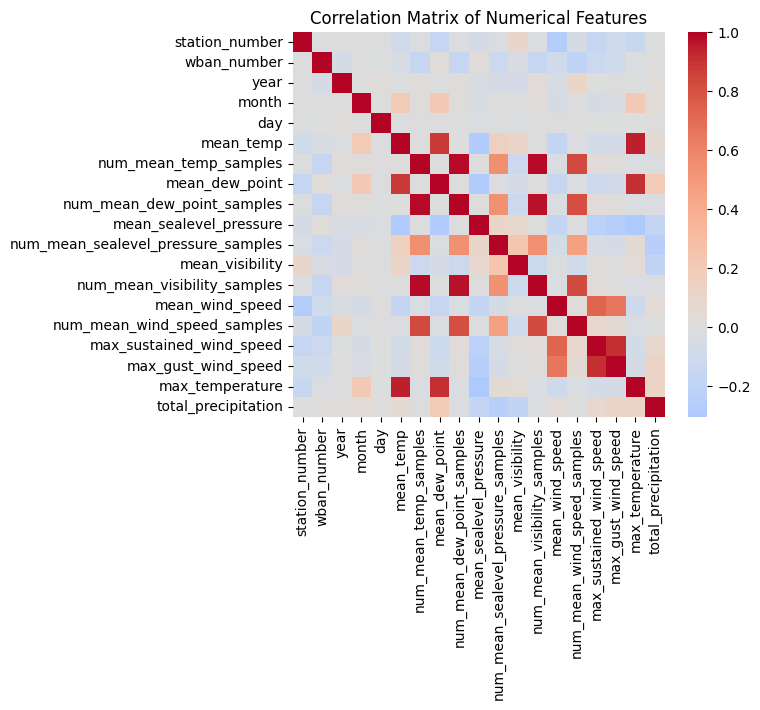

In [39]:
'''
We selected numeric columns without missing values, computed their correlation matrix, 
and visualized it using a heatmap to identify pairs of highly correlated features, which would then be dropped.
'''
import seaborn as sns

# Only numeric
numeric_df = df_weather_filtered.select_dtypes(include='number').dropna()

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [40]:
'''
We computed the absolute correlation matrix for numeric columns, 
identified highly correlated feature pairs (correlation > 0.95) using the upper triangle, 
and dropped those redundant columns to reduce multicollinearity.
'''

# Compute correlation matrix (no NaNs allowed)
numeric_df = df_weather_filtered.select_dtypes(include='number').dropna()
corr_matrix = numeric_df.corr().abs()

# Upper triangle of correlation matrix (to avoid duplicates)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"Highly correlated columns to drop (corr > 0.95): {to_drop}")

# Drop from the original dataset
df_weather_filtered.drop(columns=to_drop, inplace=True)


Highly correlated columns to drop (corr > 0.95): ['num_mean_dew_point_samples', 'num_mean_visibility_samples']


In [41]:
df_weather_filtered.head(2)

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_visibility,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,total_precipitation,fog,rain,snow,hail,thunder,tornado,date
0,725835,99999,2000,11,7,35.599998,4,20.799999,NaN,<NA>,32.5,7.5,4,9.9,NaN,28.4,True,NaN,False,False,False,False,False,False,2000-11-07
1,725826,99999,2000,6,9,44.200001,4,39.200001,NaN,<NA>,25.0,4.5,4,8.0,NaN,39.0,False,NaN,False,False,False,False,False,False,2000-06-09


### Reducing Redundancy 

In [42]:
'''
We dropped redundant columns such as date components, sample counts, and IDs 
that don't add predictive or analytical value to the dataset.
'''

cols_to_drop = [
    'year',
    'month',
    'day',
    'wban_number',
    'num_mean_temp_samples',
    'num_mean_sealevel_pressure_samples',
    'num_mean_wind_speed_samples',
]

df_weather_filtered.drop(columns=cols_to_drop, inplace=True)

In [43]:
df_weather_filtered.head(5)

,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,total_precipitation,fog,rain,snow,hail,thunder,tornado,date
0,725835,35.599998,20.799999,NaN,32.5,7.5,9.9,NaN,28.400000,True,NaN,False,False,False,False,False,False,2000-11-07
1,725826,44.200001,39.200001,NaN,25.0,4.5,8.0,NaN,39.000000,False,NaN,False,False,False,False,False,False,2000-06-09
2,725494,49.099998,30.200001,NaN,10.0,10.0,14.0,16.9,48.200001,True,0.00,False,False,False,False,False,False,2000-04-11
3,725868,20.700001,15.300000,NaN,17.5,2.5,9.9,NaN,8.100000,False,0.00,False,False,False,False,False,False,2000-01-01
4,725868,59.500000,55.000000,NaN,4.3,1.5,6.0,NaN,55.400002,True,0.08,False,False,False,False,False,False,2000-08-30


# Further Exploratory Data Analysis

## Before the dataset can further be processed it needs to be split  to avoid data leakage

In [44]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=20*365)).split(' ')[0]

import datetime as dt
import pandas as pd

# Assume df_weather_filtered is already loaded and cleaned
df = df_weather_filtered.copy()

# Parse date column
df['date'] = pd.to_datetime(df['date'])

# Define today and "20 years ago tomorrow"
today = dt.datetime.today()
test_date = today - dt.timedelta(days=20*365)
test_date = test_date.replace(hour=0, minute=0, second=0, microsecond=0)

# Filter sets
df_test = df[df['date'] == test_date]

# Evaluation set: 30 days before test_date
eval_start = test_date - dt.timedelta(days=30)
df_eval = df[(df['date'] >= eval_start) & (df['date'] < test_date)]

# Training set: everything before eval_start
df_train = df[df['date'] < eval_start]

# Print shapes
print(f"Train set: {df_train.shape}")
print(f"Eval set : {df_eval.shape}")
print(f"Test set : {df_test.shape}")

# Optionally inspect the test date
print(f"Test date (20 years ago tomorrow): {test_date.date()}")



Train set: (401672, 18)
Eval set : (6210, 18)
Test set : (203, 18)
Test date (20 years ago tomorrow): 2005-06-26


<Axes: >

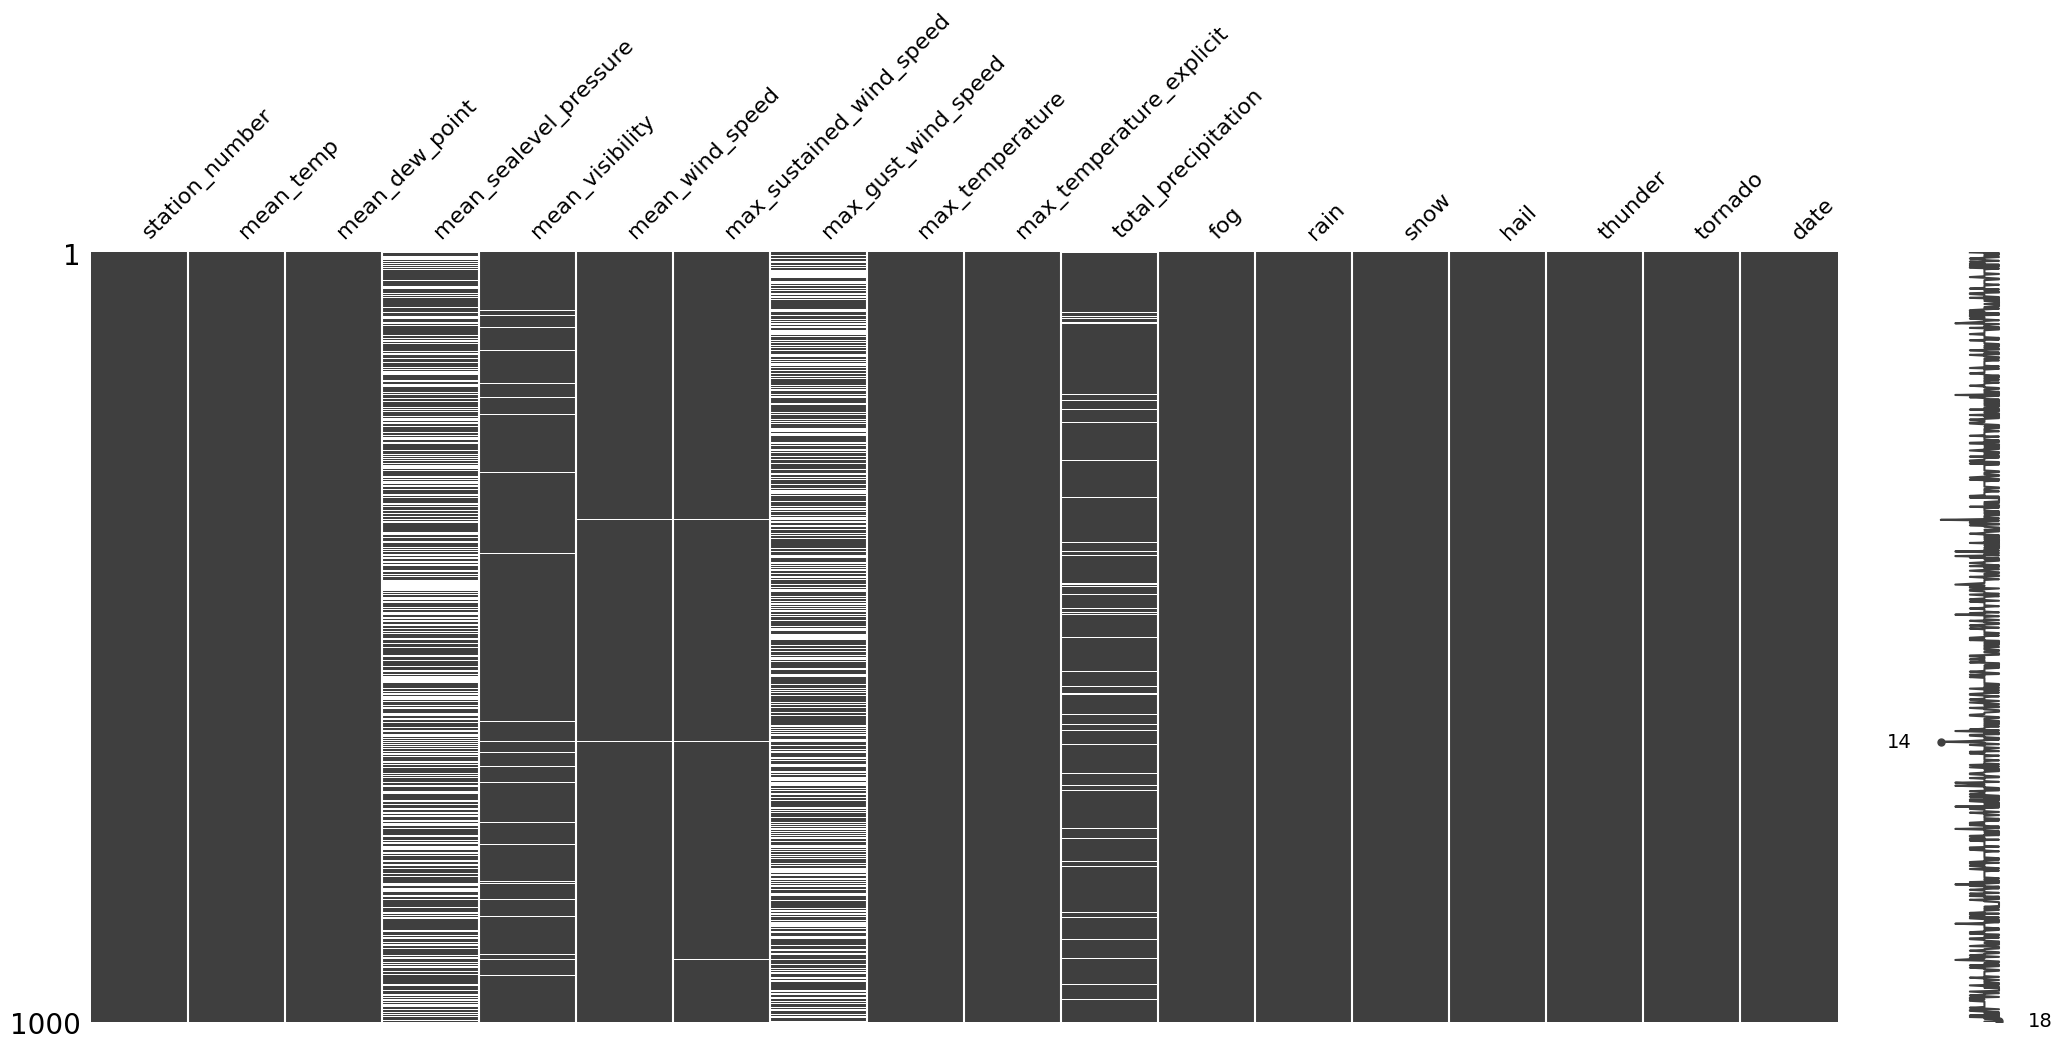

In [45]:
'''
We used the missingno library to visualize the structure of missing data 
in a random sample of 1000 rows, helping us spot patterns or dependencies in missingness.
'''
import missingno as msno

# Visual overview of missingness structure
msno.matrix(df_weather_filtered.sample(1000))
# msno.heatmap(df_weather_filtered)


In [46]:
df_weather_filtered = df_train.copy()

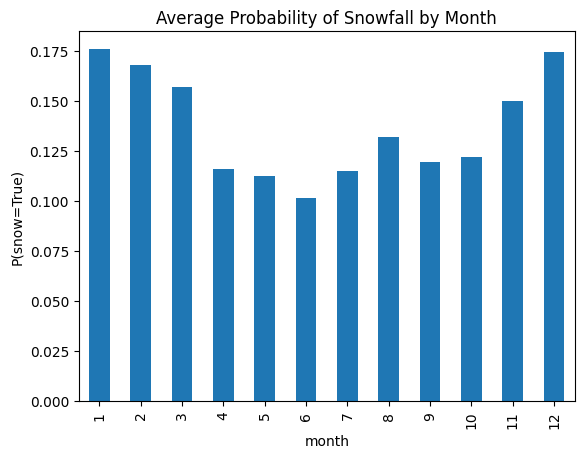

In [47]:
'''
We plotted the average probability of snowfall by month 
to verify that snowfall occurrences align with expected seasonal patterns.
'''

# Snow depth or snowfall rate by month
df_weather_filtered['month'] = df_weather_filtered['date'].dt.month
df_weather_filtered.groupby('month')['snow'].mean().plot(kind='bar')
plt.title("Average Probability of Snowfall by Month")
plt.ylabel("P(snow=True)")
plt.show()


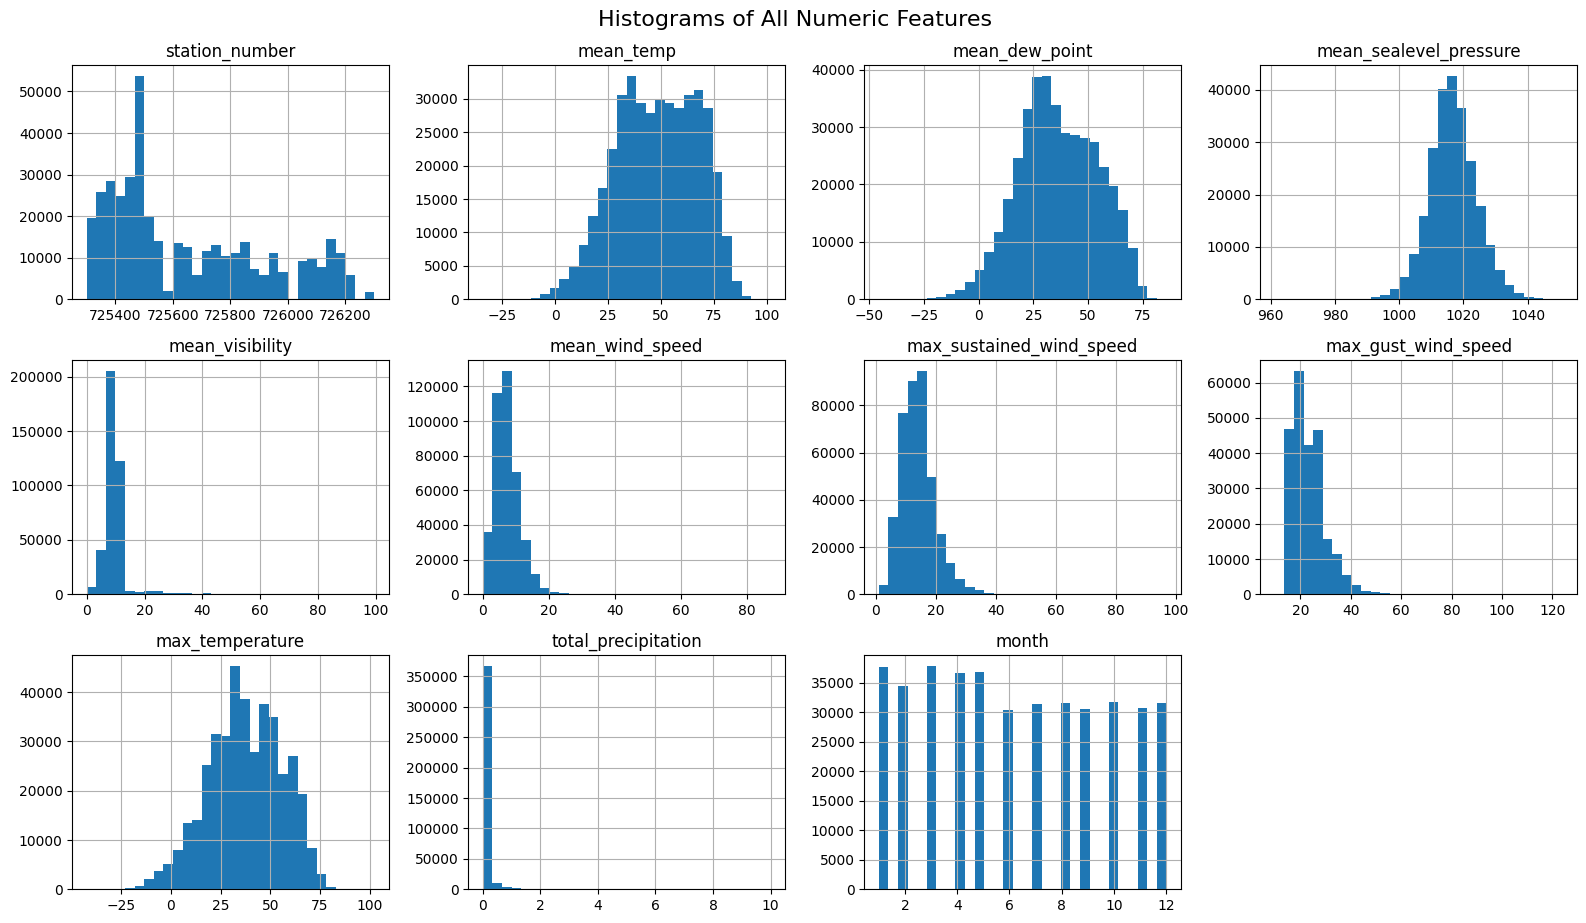

In [48]:
import matplotlib.pyplot as plt


# Select only numeric columns
numeric_cols = df_weather_filtered.select_dtypes(include=np.number).columns
n_cols = len(numeric_cols)

# Layout configuration: e.g., 4 columns per row
n_plot_cols = 4
n_rows = int(np.ceil(n_cols / n_plot_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_plot_cols, figsize=(n_plot_cols * 4, n_rows * 3))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    df_weather_filtered[col].hist(ax=ax, bins=30)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Turn off unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Histograms of All Numeric Features", fontsize=16, y=1.02)
plt.show()


In [49]:
'''
We visually inspected the distributions of numerical features using histograms 
to guide imputation and transformation strategies, and based on skewness, spread, 
and sparsity, we proposed actionable preprocessing steps such as imputation methods, 
scaling, log-transforms, or dropping highly correlated or low-value columns.
'''

'\nWe visually inspected the distributions of numerical features using histograms \nto guide imputation and transformation strategies, and based on skewness, spread, \nand sparsity, we proposed actionable preprocessing steps such as imputation methods, \nscaling, log-transforms, or dropping highly correlated or low-value columns.\n'

## 🧼 Actionable Data Processing Decisions

| Feature                  | Imputation        | Additional Actions                                        |
|--------------------------|-------------------|-----------------------------------------------------------|
| `mean_temp`              | Median or Mean    | Normalize if needed                                       |
| `mean_dew_point`         | Median            | Possibly drop if highly correlated with `mean_temp`       |
| `mean_visibility`        | Median or KNN     | Consider capping outliers                                 |
| `mean_wind_speed`        | Median or KNN     | Log-transform or cap                                      |
| `max_sustained_wind_speed` | Median or KNN   | Same as above                                             |
| `max_gust_wind_speed`    | Median or KNN     | Log-transform; check for sensor noise                     |
| `mean_sealevel_pressure` | Mean              | Optionally drop if highly correlated with `station_pressure` |
| `total_precipitation`    | Median or KNN     | Log-transform; optionally engineer `is_rain_event` flag   |
| `month`                  | Do not impute     | Convert to cyclical encoding or seasonal grouping         |
| `station_number`         | Do not impute     | Treat as ID or categorical feature; avoid direct modeling |

In [50]:
# List of columns to median-impute (Gaussian-ish)
median_impute_cols = [
    'mean_temp',
    'mean_dew_point',
    'mean_sealevel_pressure',
    'max_temperature'
]

# Apply median imputation
for col in median_impute_cols:
    median_val = df_weather_filtered[col].median()
    df_weather_filtered[col].fillna(median_val, inplace=True)
    print(f"Imputed '{col}' with median value: {median_val:.2f}")


Imputed 'mean_temp' with median value: 48.70
Imputed 'mean_dew_point' with median value: 35.20
Imputed 'mean_sealevel_pressure' with median value: 1016.50
Imputed 'max_temperature' with median value: 37.40


C:\Users\msi\AppData\Local\Temp\ipykernel_2312\3069041526.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather_filtered[col].fillna(median_val, inplace=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_2312\3069041526.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [51]:
# Check if column exists
if 'mean_sealevel_pressure' in df_weather_filtered.columns:
    mean_val = df_weather_filtered['mean_sealevel_pressure'].mean()
    df_weather_filtered['mean_sealevel_pressure'].fillna(mean_val, inplace=True)
    print(f"Imputed 'mean_sealevel_pressure' with mean value: {mean_val:.2f}")
else:
    print("'mean_sealevel_pressure' column not found.")



Imputed 'mean_sealevel_pressure' with mean value: 1016.64


C:\Users\msi\AppData\Local\Temp\ipykernel_2312\3442741878.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather_filtered['mean_sealevel_pressure'].fillna(mean_val, inplace=True)


In [52]:
df_weather_filtered.head(5)

,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,total_precipitation,fog,rain,snow,hail,thunder,tornado,date,month
0,725835,35.599998,20.799999,1016.5,32.5,7.5,9.9,NaN,28.400000,True,NaN,False,False,False,False,False,False,2000-11-07,11
1,725826,44.200001,39.200001,1016.5,25.0,4.5,8.0,NaN,39.000000,False,NaN,False,False,False,False,False,False,2000-06-09,6
2,725494,49.099998,30.200001,1016.5,10.0,10.0,14.0,16.9,48.200001,True,0.00,False,False,False,False,False,False,2000-04-11,4
3,725868,20.700001,15.300000,1016.5,17.5,2.5,9.9,NaN,8.100000,False,0.00,False,False,False,False,False,False,2000-01-01,1
4,725868,59.500000,55.000000,1016.5,4.3,1.5,6.0,NaN,55.400002,True,0.08,False,False,False,False,False,False,2000-08-30,8


In [53]:
'''
We applied cyclical encoding to capture the repeating nature of months (e.g., January and December are close), 
which helps models learn seasonal patterns without falsely assuming linear distance between months.
'''

# Ensure 'month' exists
if 'month' not in df_weather_filtered.columns:
    df_weather_filtered['date'] = pd.to_datetime(df_weather_filtered['date'], errors='coerce')


# Encode cyclical month
df_weather_filtered['month_sin'] = np.sin(2 * np.pi * df_weather_filtered['month'] / 12)
df_weather_filtered['month_cos'] = np.cos(2 * np.pi * df_weather_filtered['month'] / 12)

# Drop raw month column
df_weather_filtered.drop(columns=['month'], inplace=True)

print("Applied cyclical encoding to 'month' and dropped original column.")


Applied cyclical encoding to 'month' and dropped original column.


In [54]:
numeric_cols = df_weather_filtered.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns:")
print(numeric_cols)

Numeric columns:
['station_number', 'mean_temp', 'mean_dew_point', 'mean_sealevel_pressure', 'mean_visibility', 'mean_wind_speed', 'max_sustained_wind_speed', 'max_gust_wind_speed', 'max_temperature', 'total_precipitation', 'month_sin', 'month_cos']


In [55]:
'''
We computed the point-biserial correlation between the binary snowfall indicator and max gust wind speed 
to measure whether stronger gusts are associated with snowfall occurrence, 
which helps assess predictive or explanatory power of wind-related features.
'''

from scipy.stats import pointbiserialr

# Convert 'snow' to integer (0 or 1) if not already
df_weather_filtered['snow_binary'] = df_weather_filtered['snow'].astype(int)

# Drop rows with missing gust wind speed
filtered = df_weather_filtered[['max_gust_wind_speed', 'snow_binary']].dropna()

# Calculate point-biserial correlation
r, p = pointbiserialr(filtered['snow_binary'], filtered['max_gust_wind_speed'])

print(f"Point-biserial correlation: {r:.3f}")
print(f"P-value: {p:.3g}")


Point-biserial correlation: 0.107
P-value: 0


In [56]:
'''
Since the point-biserial correlation between max gust wind speed and snowfall is very weak (r ≈ 0.107) 
and the p-value is effectively zero due to sample size, we conclude that this feature has little predictive 
value for snowfall and can be safely dropped to simplify the model.
'''

df_weather_filtered.drop(columns=['max_gust_wind_speed'], inplace=True)
print("'max_gust_wind_speed' column dropped.")

'max_gust_wind_speed' column dropped.


## Removing Outliers

In [57]:
def remove_outliers_iqr_per_group(df, group_col, cols, multiplier=1.5):
    def filter_group(group):
        for col in cols:
            Q1 = group[col].quantile(0.25)
            Q3 = group[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - multiplier * IQR
            upper = Q3 + multiplier * IQR
            group = group[(group[col] >= lower) & (group[col] <= upper)]
        return group
    
    return df.groupby(group_col, group_keys=False).apply(filter_group)

numeric_cols = df_weather_filtered.select_dtypes(include=np.number).columns.tolist()
# Try with 1.5 but within-station
df_weather_filtered_outlier_removed = remove_outliers_iqr_per_group(
    df_weather_filtered, 
    group_col='station_number', 
    cols=numeric_cols, 
    multiplier=1.5
)

df_weather_filtered_outlier_removed.head()

C:\Users\msi\AppData\Local\Temp\ipykernel_2312\1663225399.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col, group_keys=False).apply(filter_group)


,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_temperature,max_temperature_explicit,total_precipitation,fog,rain,snow,hail,thunder,tornado,date,month_sin,month_cos,snow_binary
502,725300,26.100000,20.100000,1013.400024,7.5,15.0,20.0,19.9,False,0.03,True,True,True,True,True,True,2000-11-20,-5.000000e-01,0.866025,1
557,725300,55.200001,48.299999,1020.299988,9.6,4.9,8.9,45.0,False,0.02,True,True,True,True,True,True,2000-06-04,1.224647e-16,-1.000000,1
560,725300,75.500000,65.199997,1012.200012,9.6,4.7,11.1,64.0,False,0.02,False,False,False,False,False,False,2000-07-28,-5.000000e-01,-0.866025,0
624,725300,27.400000,16.799999,1031.099976,9.7,6.2,11.1,18.0,False,0.00,False,False,False,False,False,False,2000-02-17,8.660254e-01,0.500000,0
918,725300,67.199997,59.599998,1012.099976,9.5,4.9,14.0,61.0,False,0.00,True,True,True,True,True,True,2001-08-18,-8.660254e-01,-0.500000,1


In [58]:
#  Ensure binary target
df_weather_filtered['snow_binary'] = df_weather_filtered['snow'].astype(int)

# Numeric columns
numeric_cols = df_weather_filtered.select_dtypes(include=np.number).columns.tolist()

# Exclude identifiers and target itself
excluded_cols = ['station_number', 'snow_binary', 'snow']
numeric_cols = [col for col in numeric_cols if col not in excluded_cols]

# Store results
correlation_results = []

for col in numeric_cols:
    sub_df = df_weather_filtered[[col, 'snow_binary']].dropna()
    if sub_df[col].nunique() > 1:  # skip constant columns
        r, p = pointbiserialr(sub_df['snow_binary'], sub_df[col])
        correlation_results.append({
            'Feature': col,
            'Correlation': r,
            'P-value': p
        })

# Create summary DataFrame
correlation_df = pd.DataFrame(correlation_results)
correlation_df['AbsCorrelation'] = correlation_df['Correlation'].abs()
correlation_df.sort_values(by='AbsCorrelation', ascending=False, inplace=True)

# Show top results
print(correlation_df[['Feature', 'Correlation', 'P-value']])

                    Feature  Correlation        P-value
3           mean_visibility    -0.182322   0.000000e+00
7       total_precipitation     0.162634   0.000000e+00
0                 mean_temp    -0.079418   0.000000e+00
9                 month_cos     0.061974   0.000000e+00
6           max_temperature    -0.050556  1.500890e-225
1            mean_dew_point     0.043065  3.601185e-164
2    mean_sealevel_pressure    -0.040990  6.555573e-149
4           mean_wind_speed     0.029310   6.822011e-77
5  max_sustained_wind_speed     0.028876   1.518828e-74
8                 month_sin     0.025832   2.918728e-60


In [59]:
'''
We computed the point-biserial correlation between each numeric feature and the binary snowfall indicator 
to assess their predictive strength; based on very weak correlations, we dropped features like max sustained wind speed, 
mean wind speed, and month_sin to reduce noise and simplify the model without sacrificing signal.
'''
drop_weak_predictors = [
    'max_sustained_wind_speed',
    'mean_wind_speed',
    'month_sin'  # optional if using month_cos only
]
df_weather_filtered_outlier_removed.drop(columns=drop_weak_predictors, inplace=True)
print(f"Dropped: {drop_weak_predictors}")

Dropped: ['max_sustained_wind_speed', 'mean_wind_speed', 'month_sin']


## Re-check for null columns

In [60]:
# Calculate percentage of missing values per column
null_percent = df_weather_filtered_outlier_removed.isnull().mean() * 100

# Convert to DataFrame for nicer display (optional)
null_summary = null_percent.reset_index()
null_summary.columns = ['Column', 'PercentMissing']
null_summary = null_summary.sort_values(by='PercentMissing', ascending=False)

print(null_summary)

                      Column  PercentMissing
6   max_temperature_explicit        0.018199
0             station_number        0.000000
1                  mean_temp        0.000000
3     mean_sealevel_pressure        0.000000
2             mean_dew_point        0.000000
4            mean_visibility        0.000000
5            max_temperature        0.000000
7        total_precipitation        0.000000
8                        fog        0.000000
9                       rain        0.000000
10                      snow        0.000000
11                      hail        0.000000
12                   thunder        0.000000
13                   tornado        0.000000
14                      date        0.000000
15                 month_cos        0.000000
16               snow_binary        0.000000


In [ ]:
'''
We applied log1p transformation to skewed numeric features to reduce the effect of extreme values, 
converted a boolean column to integer for modeling, and dropped 'station_number' as it acts as an identifier 
with no predictive value.
'''
# List of features to log-transform
cols_to_log_transform = [
    'mean_wind_speed',
    'max_sustained_wind_speed',
    'total_precipitation'
]

# Apply log1p (log(x + 1)) transform
for col in cols_to_log_transform:
    if col in df_weather_filtered_outlier_removed.columns:
        df_weather_filtered_outlier_removed[col] = np.log1p(df_weather_filtered_outlier_removed[col])
        print(f"Applied log1p transform to '{col}'")
    else:
        print(f"Column '{col}' not found — skipping")


df_weather_filtered_outlier_removed['max_temperature_explicit'] = (
            df_weather_filtered_outlier_removed['max_temperature_explicit']
            .fillna(False)  # or leave as-is if already imputed
            .astype(int)
        )

df_weather_filtered_outlier_removed.drop(columns=['station_number'], inplace=True)
print("'station_number' column dropped.")


Column 'mean_wind_speed' not found — skipping
Column 'max_sustained_wind_speed' not found — skipping
Applied log1p transform to 'total_precipitation'
'station_number' column dropped.


In [62]:
df_weather_filtered_outlier_removed.head()

,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,max_temperature,max_temperature_explicit,total_precipitation,fog,rain,snow,hail,thunder,tornado,date,month_cos,snow_binary
502,26.100000,20.100000,1013.400024,7.5,19.9,0,0.029559,True,True,True,True,True,True,2000-11-20,0.866025,1
557,55.200001,48.299999,1020.299988,9.6,45.0,0,0.019803,True,True,True,True,True,True,2000-06-04,-1.000000,1
560,75.500000,65.199997,1012.200012,9.6,64.0,0,0.019803,False,False,False,False,False,False,2000-07-28,-0.866025,0
624,27.400000,16.799999,1031.099976,9.7,18.0,0,0.000000,False,False,False,False,False,False,2000-02-17,0.500000,0
918,67.199997,59.599998,1012.099976,9.5,61.0,0,0.000000,True,True,True,True,True,True,2001-08-18,-0.500000,1


# Imputations

In [ ]:
'''
We used KNN imputation because it leverages relationships between multiple features to estimate missing values more accurately 
than simple mean or median imputation, especially for variables like precipitation and visibility that depend on complex weather patterns.
'''

from sklearn.impute import KNNImputer
import pandas as pd

# Step 1: Columns we want to prioritize imputing
cols_to_impute = ['total_precipitation', 'mean_visibility']

# Step 2: Ensure all are numeric (especially max_temperature_explicit)
for col in cols_to_impute:
    df_weather_filtered_outlier_removed[col] = pd.to_numeric(
        df_weather_filtered_outlier_removed[col], errors='coerce'
    )

# Step 3: Extract numeric columns (excluding station ID and flags if needed)
numeric_cols = df_weather_filtered_outlier_removed.select_dtypes(include=np.number).columns.tolist()

# Step 4: Apply KNN imputation on all numeric data
imputer = KNNImputer(n_neighbors=5)
numeric_imputed = imputer.fit_transform(df_weather_filtered_outlier_removed[numeric_cols])

# Step 5: Assign imputed values back
df_weather_filtered_outlier_removed[numeric_cols] = pd.DataFrame(
    numeric_imputed, columns=numeric_cols, index=df_weather_filtered_outlier_removed.index
)

# Step 6: Final sanity check
null_check = df_weather_filtered_outlier_removed[cols_to_impute].isna().sum()
print("Nulls remaining after KNN imputation:\n", null_check)


Nulls remaining after KNN imputation:
 total_precipitation    0
mean_visibility        0
dtype: int64


In [64]:
print(df_weather_filtered_outlier_removed['max_temperature_explicit'].unique())
print(df_weather_filtered_outlier_removed['max_temperature_explicit'].dtype)
mode = df_weather_filtered_outlier_removed['max_temperature_explicit'].mode().iloc[0]
df_weather_filtered_outlier_removed['max_temperature_explicit'].fillna(mode, inplace=True)


[0. 1.]
float64


C:\Users\msi\AppData\Local\Temp\ipykernel_2312\971466052.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather_filtered_outlier_removed['max_temperature_explicit'].fillna(mode, inplace=True)


### Checking Null values one last time

In [65]:
# Calculate percentage of missing values per column
null_percent = df_weather_filtered_outlier_removed.isnull().mean() * 100

# Convert to DataFrame for nicer display (optional)
null_summary = null_percent.reset_index()
null_summary.columns = ['Column', 'PercentMissing']
null_summary = null_summary.sort_values(by='PercentMissing', ascending=False)

print(null_summary)

                      Column  PercentMissing
0                  mean_temp             0.0
1             mean_dew_point             0.0
2     mean_sealevel_pressure             0.0
3            mean_visibility             0.0
4            max_temperature             0.0
5   max_temperature_explicit             0.0
6        total_precipitation             0.0
7                        fog             0.0
8                       rain             0.0
9                       snow             0.0
10                      hail             0.0
11                   thunder             0.0
12                   tornado             0.0
13                      date             0.0
14                 month_cos             0.0
15               snow_binary             0.0


In [ ]:
'''
We imputed missing values in binary weather event flags as False (i.e., no event), 
then converted them to integers; since these flags are highly correlated with the target variable 'snow', 
they offer redundant information and should be removed to prevent data leakage.
'''

binary_flags = ['fog', 'rain', 'snow', 'hail', 'thunder', 'tornado']

for col in binary_flags:
    df_weather_filtered_outlier_removed[col] = (
        df_weather_filtered_outlier_removed[col]
        .fillna(False)   # Missing = no event occurred
        .astype(int)     # True → 1, False → 0
    )

print(df_weather_filtered_outlier_removed[binary_flags].dtypes)


fog        int64
rain       int64
snow       int64
hail       int64
thunder    int64
tornado    int64
dtype: object


In [67]:
df_weather_filtered_outlier_removed.head()

,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,max_temperature,max_temperature_explicit,total_precipitation,fog,rain,snow,hail,thunder,tornado,date,month_cos,snow_binary
502,26.100000,20.100000,1013.400024,7.5,19.9,0.0,0.029559,1,1,1,1,1,1,2000-11-20,0.866025,1.0
557,55.200001,48.299999,1020.299988,9.6,45.0,0.0,0.019803,1,1,1,1,1,1,2000-06-04,-1.000000,1.0
560,75.500000,65.199997,1012.200012,9.6,64.0,0.0,0.019803,0,0,0,0,0,0,2000-07-28,-0.866025,0.0
624,27.400000,16.799999,1031.099976,9.7,18.0,0.0,0.000000,0,0,0,0,0,0,2000-02-17,0.500000,0.0
918,67.199997,59.599998,1012.099976,9.5,61.0,0.0,0.000000,1,1,1,1,1,1,2001-08-18,-0.500000,1.0


In [68]:
df_weather_filtered_outlier_removed.drop(columns=['snow_binary'], inplace=True)
print("'snow_binary' column dropped.")

'snow_binary' column dropped.


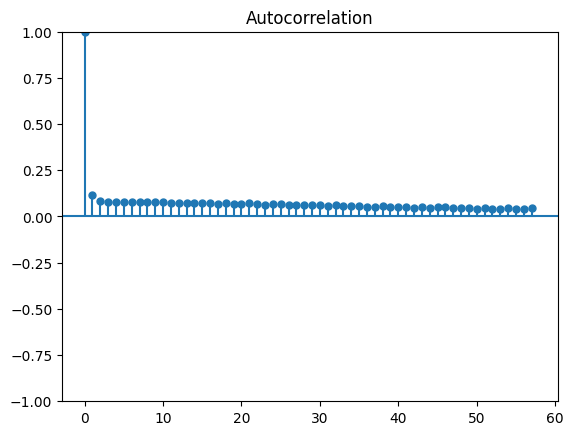

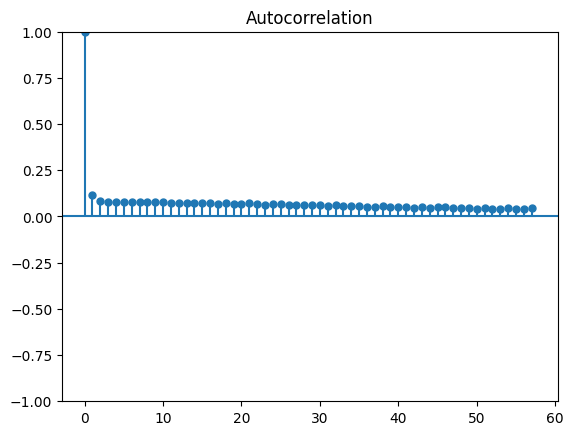

In [ ]:
'''
We used autocorrelation (ACF) analysis on the binary snowfall indicator to check for temporal dependencies, 
which helps determine whether snowfall events are correlated across time and if time-series modeling is appropriate.
The plot showed no strong temporal dependence beyond lag 0, 
indicating that snowfall events are largely independent from one day to the next, 
so time-series modeling is not necessary for this target.
'''

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['snow'])

In [ ]:
'''
We printed the count and proportion of snowfall occurrences to reveal class imbalance, 
which must be addressed during model training to avoid biased predictions toward the majority class.
'''

print("Snow value counts in X_train_clean:")
print(df['snow'].value_counts())

print("\nProportion (%):")
print(df['snow'].value_counts(normalize=True) * 100)

Snow value counts in X_train_clean:
snow
False    384680
True      62357
Name: count, dtype: Int64

Proportion (%):
snow
False    86.051043
True     13.948957
Name: proportion, dtype: Float64


### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [72]:
# The split has been done earlier in the process

## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [73]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=20*365)).split(' ')[0]

'2005-06-26'

In [74]:
# The solution is in the Coding Challenge notebook,

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 